In [15]:
import keras
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import Dense, Dropout, Flatten
from keras.models import Model
from keras.preprocessing import image as image_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras import models, layers, optimizers

In [62]:
import matplotlib.pyplot as plt
plt.style.use('default')

In [8]:
import os
def plot_imgs(directory, top=10):
    all_item_dirs = os.listdir(directory)
    item_files = [os.path.join(directory, file) for file in all_item_dirs][:5]
  
    plt.figure(figsize=(20, 20))
  
    for i, img_path in enumerate(item_files):
        plt.subplot(10, 10, i+1)
    
        img = plt.imread(img_path)
        plt.tight_layout()         
        plt.imshow(img, cmap='gray') 

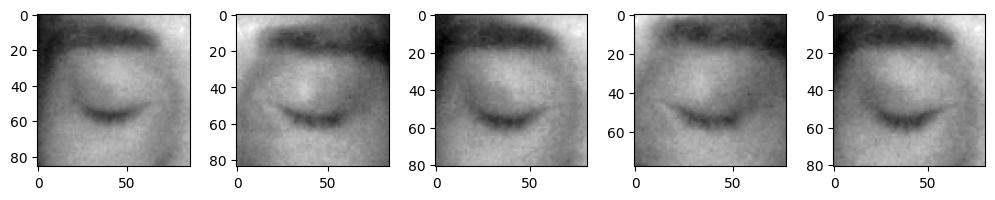

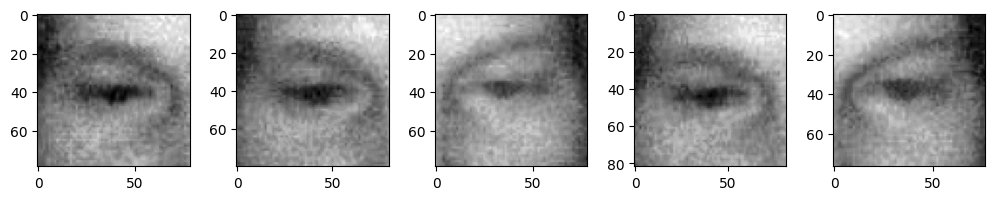

In [9]:
data_path = 'train'

directories = ['/Closed', '/Open']

for j in directories:
    plot_imgs(data_path+j)

In [10]:
batch_size = 128
train_datagen = ImageDataGenerator(horizontal_flip = True, 
                                  rescale = 1./255, 
                                  zoom_range = 0.2, 
                                  validation_split = 0.1)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [28]:
train_data_path = 'train'
test_data_path = 'test'

train_set = train_datagen.flow_from_directory(train_data_path, target_size = (32,32),
                                              batch_size = batch_size, 
                                              color_mode = 'grayscale',
                                              class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(test_data_path, target_size = (32,32),
                                              batch_size = batch_size, 
                                              color_mode = 'grayscale',
                                              class_mode = 'categorical')

Found 81675 images belonging to 2 classes.
Found 3223 images belonging to 2 classes.


In [40]:
classes = 2

model1 = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
optimizer1 = optimizers.Adam()
base_model = model1

# Them cac lop ben tren
x = base_model.output
x = Flatten()(x)
x = Dense(128, activation='relu', name='fc1')(x)
x = Dense(128, activation='relu', name='fc2')(x)
x = Dense(128, activation='relu', name='fc2a')(x)
x = Dense(128, activation='relu', name='fc3')(x)
x = Dropout(0.5)(x)
x = Dense(64, activation='relu', name='fc4')(x)

predictions = Dense(2, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)
for layer in base_model.layers:
    layer.trainable = False
print(model.summary())

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [41]:
model.compile(loss = 'categorical_crossentropy',optimizer = 'adam' , metrics = ['accuracy'])

In [42]:
model_path="yawn_detectionVGG.h5"

checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, 
                              save_best_only=True, mode='max')

callbacks_list = [checkpoint]

In [43]:
num_epochs = 25
training_steps=train_set.n//train_set.batch_size
validation_steps =test_set.n//test_set.batch_size

In [44]:
history = model.fit(train_set, epochs=num_epochs, steps_per_epoch=training_steps,validation_data=test_set,
                    validation_steps=validation_steps, callbacks = callbacks_list)

Epoch 1/25


InvalidArgumentError: Graph execution error:

Detected at node 'model_6/block1_conv1/Relu' defined at (most recent call last):
    File "e:\anaconda3\envs\image-processing\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "e:\anaconda3\envs\image-processing\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "e:\anaconda3\envs\image-processing\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "e:\anaconda3\envs\image-processing\lib\site-packages\traitlets\config\application.py", line 1043, in launch_instance
      app.start()
    File "e:\anaconda3\envs\image-processing\lib\site-packages\ipykernel\kernelapp.py", line 712, in start
      self.io_loop.start()
    File "e:\anaconda3\envs\image-processing\lib\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "e:\anaconda3\envs\image-processing\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "e:\anaconda3\envs\image-processing\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "e:\anaconda3\envs\image-processing\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "e:\anaconda3\envs\image-processing\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "e:\anaconda3\envs\image-processing\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "e:\anaconda3\envs\image-processing\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "e:\anaconda3\envs\image-processing\lib\site-packages\ipykernel\kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "e:\anaconda3\envs\image-processing\lib\site-packages\ipykernel\ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "e:\anaconda3\envs\image-processing\lib\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "e:\anaconda3\envs\image-processing\lib\site-packages\IPython\core\interactiveshell.py", line 2961, in run_cell
      result = self._run_cell(
    File "e:\anaconda3\envs\image-processing\lib\site-packages\IPython\core\interactiveshell.py", line 3016, in _run_cell
      result = runner(coro)
    File "e:\anaconda3\envs\image-processing\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "e:\anaconda3\envs\image-processing\lib\site-packages\IPython\core\interactiveshell.py", line 3221, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "e:\anaconda3\envs\image-processing\lib\site-packages\IPython\core\interactiveshell.py", line 3400, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "e:\anaconda3\envs\image-processing\lib\site-packages\IPython\core\interactiveshell.py", line 3460, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\mamto\AppData\Local\Temp\ipykernel_30644\4255454764.py", line 1, in <module>
      history = model.fit(train_set, epochs=num_epochs, steps_per_epoch=training_steps,validation_data=test_set,
    File "e:\anaconda3\envs\image-processing\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "e:\anaconda3\envs\image-processing\lib\site-packages\keras\engine\training.py", line 1564, in fit
      tmp_logs = self.train_function(iterator)
    File "e:\anaconda3\envs\image-processing\lib\site-packages\keras\engine\training.py", line 1160, in train_function
      return step_function(self, iterator)
    File "e:\anaconda3\envs\image-processing\lib\site-packages\keras\engine\training.py", line 1146, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "e:\anaconda3\envs\image-processing\lib\site-packages\keras\engine\training.py", line 1135, in run_step
      outputs = model.train_step(data)
    File "e:\anaconda3\envs\image-processing\lib\site-packages\keras\engine\training.py", line 993, in train_step
      y_pred = self(x, training=True)
    File "e:\anaconda3\envs\image-processing\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "e:\anaconda3\envs\image-processing\lib\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "e:\anaconda3\envs\image-processing\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "e:\anaconda3\envs\image-processing\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "e:\anaconda3\envs\image-processing\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "e:\anaconda3\envs\image-processing\lib\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "e:\anaconda3\envs\image-processing\lib\site-packages\keras\engine\functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "e:\anaconda3\envs\image-processing\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "e:\anaconda3\envs\image-processing\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "e:\anaconda3\envs\image-processing\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "e:\anaconda3\envs\image-processing\lib\site-packages\keras\layers\convolutional\base_conv.py", line 314, in call
      return self.activation(outputs)
    File "e:\anaconda3\envs\image-processing\lib\site-packages\keras\activations.py", line 317, in relu
      return backend.relu(
    File "e:\anaconda3\envs\image-processing\lib\site-packages\keras\backend.py", line 5366, in relu
      x = tf.nn.relu(x)
Node: 'model_6/block1_conv1/Relu'
input depth must be evenly divisible by filter depth: 1 vs 3
	 [[{{node model_6/block1_conv1/Relu}}]] [Op:__inference_train_function_11058]

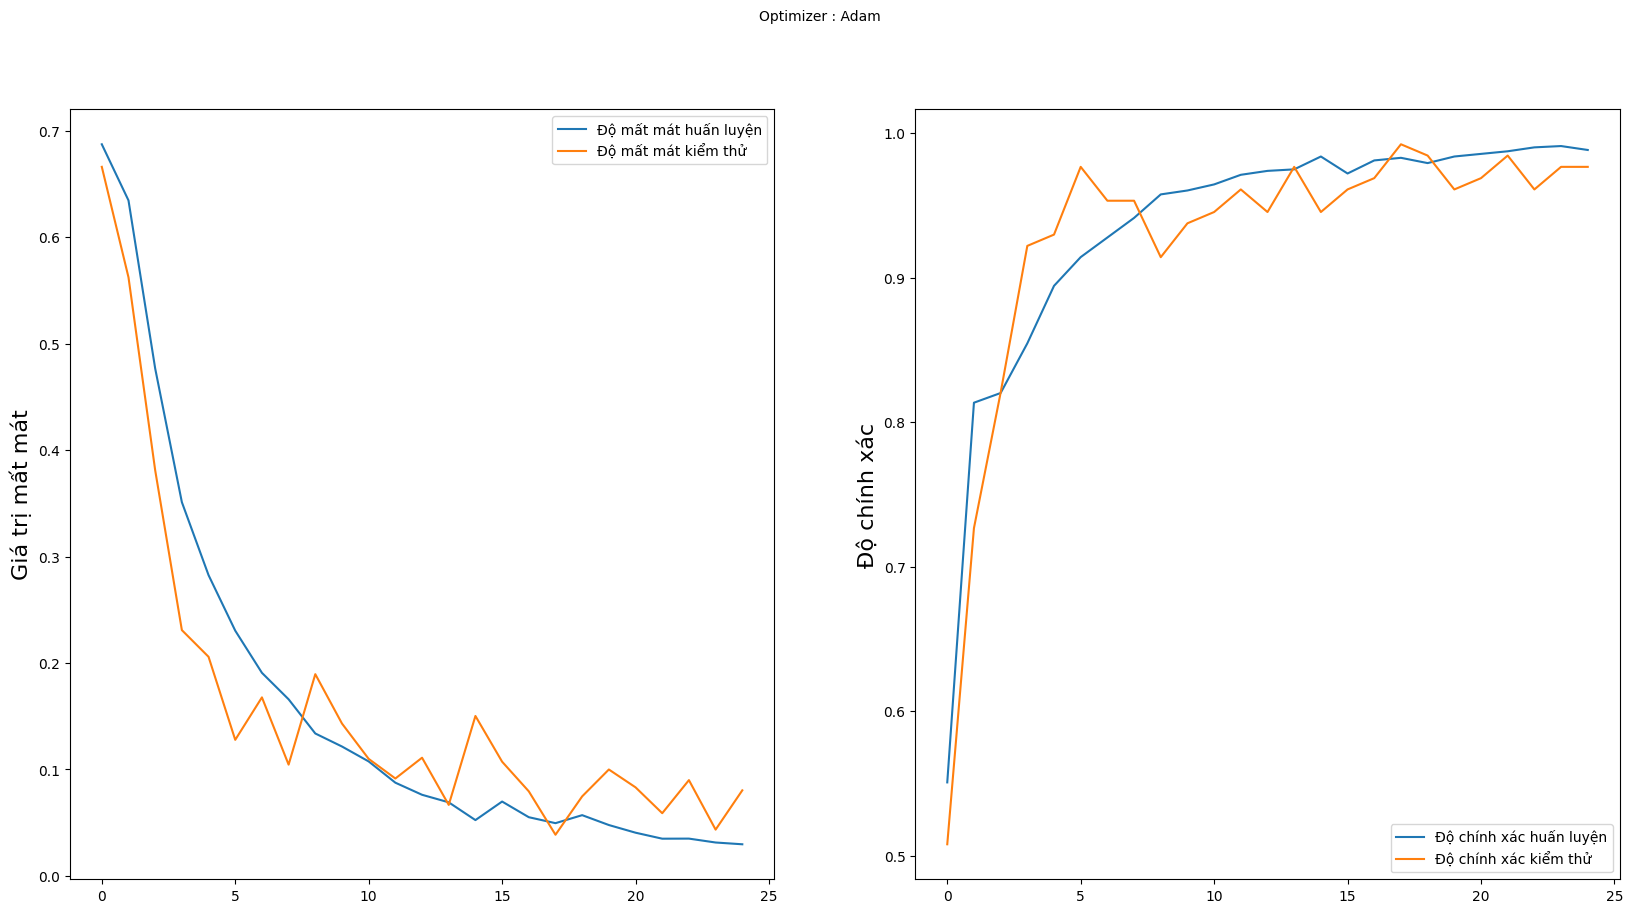

In [72]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Giá trị mất mát', fontsize=16)
plt.plot(history.history['loss'], label='Độ mất mát huấn luyện')
plt.plot(history.history['val_loss'], label='Độ mất mát kiểm thử')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Độ chính xác', fontsize=16)
plt.plot(history.history['accuracy'], label='Độ chính xác huấn luyện')
plt.plot(history.history['val_accuracy'], label='Độ chính xác kiểm thử')
plt.legend(loc='lower right')
plt.show()

2/2 [==============================] - 1s 347ms/step
Classification Report:
----------------------
               precision    recall  f1-score   support

      Closed       0.60      0.57      0.58       109
        Open       0.59      0.61      0.60       109

    accuracy                           0.59       218
   macro avg       0.59      0.59      0.59       218
weighted avg       0.59      0.59      0.59       218



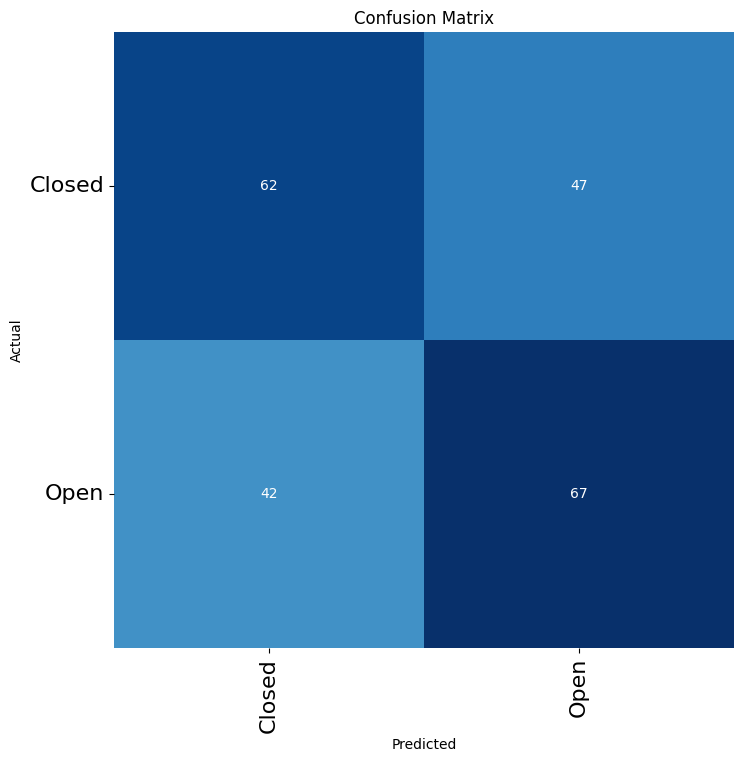

In [73]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import seaborn as sns

def cm_cr(test_gen, model):
    preds=model.predict(test_gen)    
    labels=test_gen.labels
    classes=list(test_gen.class_indices.keys()) # ordered lst of class names 
    pred_list=[ ] # will store the predicted classes here
    true_list=[]
    for i, p in enumerate (preds):
        index=np.argmax(p)
        pred_list.append(classes[index])
        true_list.append(classes[labels[i]])
    y_pred=np.array(pred_list)
    y_true=np.array(true_list)
    clr = classification_report(y_true, y_pred, target_names=classes)
    print("Classification Report:\n----------------------\n", clr)
    cm = confusion_matrix(y_true, y_pred )        
    length=len(classes)
    if length<8:
        fig_width=8
        fig_height=8
    else:
        fig_width= int(length * .5)
        fig_height= int(length * .5)
    plt.figure(figsize=(fig_width, fig_height))
    sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)       
    plt.xticks(np.arange(length)+.5, classes, rotation= 90, fontsize=16)
    plt.yticks(np.arange(length)+.5, classes, rotation=0, fontsize=16)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

cm_cr(test_set, model)

2/2 [==============================] - 1s 237ms/step
Confusion Matrix


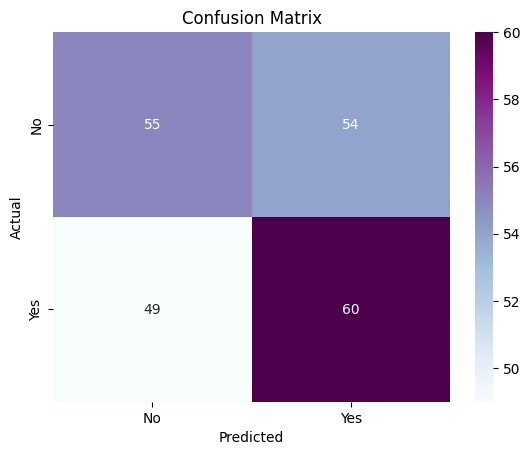

In [74]:
Y_pred = model.predict(test_set)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
qd = confusion_matrix(test_set.classes, y_pred)
ax = sns.heatmap(qd, annot=True, cmap="BuPu")
ax.set_title("Confusion Matrix");
ax.set_xlabel("Predicted")
ax.set_ylabel('Actual');
ax.xaxis.set_ticklabels(["No","Yes"])
ax.yaxis.set_ticklabels(["No","Yes"])
plt.show()